# Load the data and fit a simple model
This simple example shows you how to load the data into a jupyter notebook and fit a simple model.

In [35]:
# Load in some libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Load in the data

In [36]:
# Relative path to data
trainPath = '../../data/train.csv'
testPath = '../../data/test.csv'

dataTrain = pd.read_csv(trainPath)
dataTest = pd.read_csv(testPath)

### Look at the data

In [37]:
print "Shape of training data: " + str(dataTrain.shape)
print "Shape of test data: " + str(dataTest.shape)

Shape of training data: (1460, 81)
Shape of test data: (1459, 80)


We can get the head (top few rows) of our data:

In [38]:
dataTrain.head(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


The pandas `describe()` function shows us statistics for each column of a pandas dataframe. It doesn't make much sense for categorical variables. Also, the columns get truncated if there are too many. 

In [39]:
dataTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Now look at the distribution of sale prices:

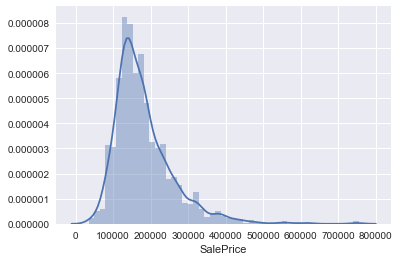

In [40]:
sns.distplot(dataTrain['SalePrice']);

Now look at the distribution of logged sale prices. The result looks more like a normal/gaussian distribution. This should help most regression models get a good fit.

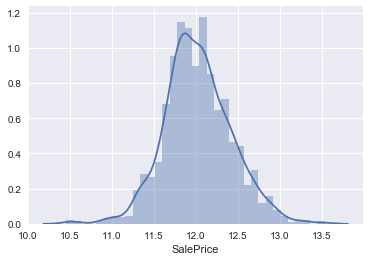

In [41]:
sns.distplot(np.log(dataTrain['SalePrice']));

### Do some preprocessing

First, drop the ids and pull out the price.

In [42]:
data_train = dataTrain.drop('Id', axis=1);
data_test = dataTest.drop('Id', axis=1);
data_y_train = data_train.pop('SalePrice')
testIds = dataTest.loc[:,'Id']

print data_train.shape, data_test.shape, data_y_train.shape

(1460, 79) (1459, 79) (1460,)


Now, let's encode the dummy variables and fill in missing values.

In [43]:
# Combine the train and test for dummy encoding:
data_all = pd.concat([data_train, data_test], axis=0)
data_all = pd.get_dummies(data_all)

# Impute the median to missing values
data_all = data_all.fillna(data_all.median())

# Now split out the train and test sets again 
data_train_encode = data_all.iloc[0:data_train.shape[0],:]
data_test_encode = data_all.iloc[data_train.shape[0]:,:]

print data_train_encode.shape, data_test_encode.shape, data_y_train.shape

(1460, 288) (1459, 288) (1460,)


### Fit a model!

Now, break the data into training and validation sets.

In [54]:
# Fraction of examples to hold out for validation
validFrac = 0.02

X_train, X_valid, y_train, y_valid = train_test_split(data_train_encode, data_y_train,
                                                      test_size=validFrac,
                                                      random_state=4)

print "Shape of training data: " + str(X_train.shape)
print "Shape of training response: " + str(y_train.shape)
print "Shape of validation data: " + str(X_valid.shape)
print "Shape of validation response: " + str(y_valid.shape)

Shape of training data: (1430, 288)
Shape of training response: (1430,)
Shape of validation data: (30, 288)
Shape of validation response: (30,)


We can go ahead and fit a model:

In [55]:
model = RandomForestRegressor(verbose=True,
                              max_depth=None,
                              n_estimators=400,
                              oob_score=False,
                             n_jobs=6)
model.fit(X_train, np.log(y_train))

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=6, oob_score=False, random_state=None,
           verbose=True, warm_start=False)

### Evaluate the model

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    0.3s finished


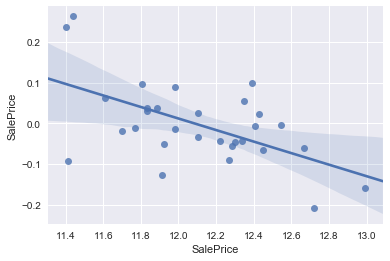

In [56]:
# Predict on new data and plot the results
y_valid_pred = model.predict(X_valid)
y_train_pred = model.predict(X_train)

# Plot the results
sns.regplot(x=np.log(y_valid), y=y_valid_pred-np.log(y_valid));

In [57]:
# Evaluate the rms error on the train set:
rmse_log_train = np.sqrt(mean_squared_error(y_train_pred, np.log(y_train)))
rmse_abs_train = np.sqrt(mean_squared_error(np.exp(y_train_pred), y_train))

print  "Training Set Errors:" \
       "\nTypical log error in housing sale price prediction: " + str(rmse_log_train) + \
       "\nTypical absolute error in housing sale price prediction: $" + str(rmse_abs_train)

Training Set Errors:
Typical log error in housing sale price prediction: 0.0514653215601
Typical absolute error in housing sale price prediction: $10854.5492461


In [58]:
# Evaluate the rms error on the validation set:
rmse_log = np.sqrt(mean_squared_error(y_valid_pred, np.log(y_valid)))
rmse_abs = np.sqrt(mean_squared_error(np.exp(y_valid_pred), y_valid))

print  "\nValidation Set Errors:" \
       "\nTypical log error in housing sale price prediction: " + str(rmse_log) + \
       "\nTypical absolute error in housing sale price prediction: $" + str(rmse_abs)


Validation Set Errors:
Typical log error in housing sale price prediction: 0.0975608634649
Typical absolute error in housing sale price prediction: $20531.5610299


## Generate the submission

In [59]:
yTestPred = np.exp(model.predict(data_test_encode))-1
dfSubmissions = pd.DataFrame(zip(testIds.as_matrix(), yTestPred), columns=['Id', 'SalePrice'])
dfSubmissions.head()

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    0.3s finished


,Id,SalePrice
0,1461,126636.248455
1,1462,153833.537662
2,1463,177658.079930
3,1464,179953.576251
4,1465,194973.727716


In [60]:
now = datetime.now().strftime('%Y%m%d_%H%M%S')
outFile = '../../data/submissions/submission_' + str(now) + '.csv'
dfSubmissions.to_csv(outFile, index=False)